<a href="https://colab.research.google.com/github/muskangupta042002/Aritificial-Neural-Network/blob/master/Breast_Cancer_Prediction_(Deep_Learning_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction

## Importing & Reading the data

In [ ]:
import pandas as pd

In this first cell we will upload the CSV files that contain the pre-sorted and pre-normalized data. 
For these I used the Wisconsin breast cancer dataset, sorted it into training and test sets with the 'input' values to the Neural Network as 'X' values, and the expected 'output' (a 0 if benign and a 1 if malignant) as the 'Y' values.


### Reading the files

In [ ]:
X_train = pd.read_csv("xtrain.csv", header=None)
Y_train = pd.read_csv("ytrain.csv", header=None)
X_test = pd.read_csv("xtest.csv", header=None)
Y_test = pd.read_csv("ytest.csv", header=None)

In [ ]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

## Creating the Neural Network

Now I'm going to use Keras to define a Neural network that will be trained off of this data. This Neural Network can then be used to predict future values for breast cancer presence. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings(action="ignore")

Using TensorFlow backend.


### Specifying the type of the model

In [ ]:
classifier = Sequential() # Initialising the ANN

### Adding the layers of the Neural Network

In [ ]:
classifier.add(Dense(units = 16, activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Once the Neural Network is defined, I now have to specify is the optimizer and loss function

### Compiling the Neural Network

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


## Training the Neural Network

You now train the neural network using Classifier.fit, passing it the training data -- i.e. for this set of X, this is what the Y should look like. The NN will then spot the patterns in the data, and build a neural network that could replicate that. 

In [ ]:
h = classifier.fit(X_train, Y_train, batch_size = 32, epochs = 150, verbose=2, validation_split=0.2)


Train on 364 samples, validate on 91 samples
Epoch 1/150
 - 5s - loss: 0.6602 - accuracy: 0.6593 - val_loss: 0.5964 - val_accuracy: 0.7473
Epoch 2/150
 - 0s - loss: 0.5399 - accuracy: 0.8462 - val_loss: 0.5153 - val_accuracy: 0.8132
Epoch 3/150
 - 0s - loss: 0.4608 - accuracy: 0.8791 - val_loss: 0.4467 - val_accuracy: 0.8681
Epoch 4/150
 - 0s - loss: 0.3937 - accuracy: 0.8929 - val_loss: 0.3813 - val_accuracy: 0.9011
Epoch 5/150
 - 0s - loss: 0.3349 - accuracy: 0.9176 - val_loss: 0.3195 - val_accuracy: 0.9341
Epoch 6/150
 - 0s - loss: 0.2826 - accuracy: 0.9313 - val_loss: 0.2680 - val_accuracy: 0.9341
Epoch 7/150
 - 0s - loss: 0.2401 - accuracy: 0.9396 - val_loss: 0.2290 - val_accuracy: 0.9670
Epoch 8/150
 - 0s - loss: 0.2075 - accuracy: 0.9423 - val_loss: 0.1983 - val_accuracy: 0.9670
Epoch 9/150
 - 0s - loss: 0.1823 - accuracy: 0.9478 - val_loss: 0.1732 - val_accuracy: 0.9670
Epoch 10/150
 - 0s - loss: 0.1613 - accuracy: 0.9560 - val_loss: 0.1510 - val_accuracy: 0.9780
Epoch 11/150


Epoch 85/150
 - 0s - loss: 0.0126 - accuracy: 0.9973 - val_loss: 0.0299 - val_accuracy: 0.9780
Epoch 86/150
 - 0s - loss: 0.0121 - accuracy: 0.9973 - val_loss: 0.0271 - val_accuracy: 0.9780
Epoch 87/150
 - 0s - loss: 0.0119 - accuracy: 0.9973 - val_loss: 0.0278 - val_accuracy: 0.9780
Epoch 88/150
 - 0s - loss: 0.0122 - accuracy: 0.9973 - val_loss: 0.0308 - val_accuracy: 0.9780
Epoch 89/150
 - 0s - loss: 0.0114 - accuracy: 0.9973 - val_loss: 0.0270 - val_accuracy: 0.9780
Epoch 90/150
 - 0s - loss: 0.0111 - accuracy: 0.9973 - val_loss: 0.0262 - val_accuracy: 0.9780
Epoch 91/150
 - 0s - loss: 0.0107 - accuracy: 0.9973 - val_loss: 0.0250 - val_accuracy: 0.9780
Epoch 92/150
 - 0s - loss: 0.0103 - accuracy: 0.9973 - val_loss: 0.0260 - val_accuracy: 0.9780
Epoch 93/150
 - 0s - loss: 0.0102 - accuracy: 0.9973 - val_loss: 0.0275 - val_accuracy: 0.9780
Epoch 94/150
 - 0s - loss: 0.0100 - accuracy: 0.9973 - val_loss: 0.0254 - val_accuracy: 0.9780
Epoch 95/150
 - 0s - loss: 0.0098 - accuracy: 0.99

In [ ]:
import matplotlib.pyplot as plt

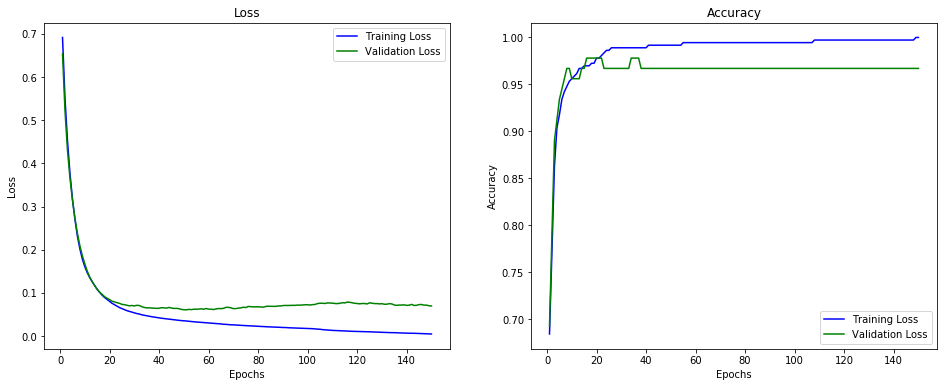

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(range(1, 151), h.history['loss'], c='b', label='Training Loss')
plt.plot(range(1, 151), h.history['val_loss'], c='g', label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(range(1, 151), h.history['accuracy'], c='b', label='Training Loss')
plt.plot(range(1, 151), h.history['val_accuracy'], c='g', label='Validation Loss')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

## Making Predictions

To predict new values, the Neural Network uses `classifier.predict()`. I'm going to pass it the test values for X (which the Neural Network hasn't previously seen) and it will give me back a set of predictions. These predicitons will be probabilities, so I will clean them up by saying that if thye are greater than .5, I'll make them 1, else I'll make them 0.

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred ]

Now we can loop through the set of predicitons for the test set (called Y_pred) and the actual values for the test set (celled Y_test), and see how alike they are -- if they are the same, I'll increment 'correct', otherwise I'll incrememnt 'wrong'. 

You'll see the result is 100% accurate, even though the neural network reported a lower accuracy than that. Why? 

## Model Evaluation

In [ ]:
total = 0
correct = 0
wrong = 0
for i in range(len(Y_pred)):
    total=total+1
    if(Y_test.at[i,0] == Y_pred[i]):
        correct=correct+1
    else:
        wrong=wrong+1

print("Total " + str(total))
print("Correct " + str(correct))
print("Wrong " + str(wrong))

Total 114
Correct 109
Wrong 5


### Confusion Matrix

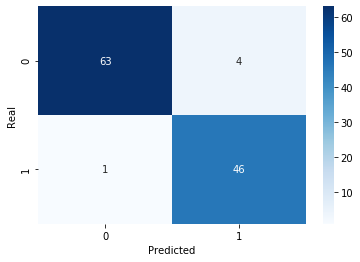

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel("Real")
plt.show()

### Accuracy & Recall

In [ ]:
from sklearn.metrics import recall_score, accuracy_score

accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print("Accuracy: {}\nRecall: {}".format(accuracy, recall))

Accuracy: 0.956140350877193
Recall: 0.9787234042553191
